<h2>Читаем данные из файла и формируем из них датасет</h2>

In [ ]:
import pandas as pd



data = pd.read_csv('bank-direct-marketing-campaigns.csv')

data.sample(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
17607,49,blue-collar,divorced,basic.6y,unknown,no,no,cellular,jul,mon,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
10853,25,blue-collar,single,basic.9y,no,no,no,telephone,jun,wed,2,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
16693,35,management,single,unknown,no,yes,yes,cellular,jul,wed,3,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
29866,33,housemaid,married,basic.4y,no,yes,no,cellular,apr,mon,3,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
9702,28,blue-collar,married,basic.6y,unknown,yes,no,telephone,jun,mon,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
22513,49,unemployed,married,high.school,unknown,yes,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
13197,40,blue-collar,divorced,basic.9y,no,yes,no,cellular,jul,wed,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
17615,53,management,married,unknown,no,no,no,cellular,jul,mon,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
11397,31,blue-collar,married,basic.9y,unknown,yes,no,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
32438,34,blue-collar,married,university.degree,no,yes,no,cellular,may,fri,2,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no


<h2>Смотрим, есть ли в датасете пустые ячейки. Оказывается, нет</h2>

In [ ]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<h2>Удалеям дубликаты. Они в данных были</h2>

In [ ]:
data.duplicated().sum()
data = data.drop_duplicates()
data.duplicated().sum()

0

<h2>Смотрим статистику</h2>

In [ ]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000,39404.000000
mean,40.116105,2.618744,960.847097,0.178738,0.064067,93.577538,-40.499604,3.601243,5165.986481
std,10.460328,2.814780,190.869184,0.503172,1.577041,0.583820,4.644327,1.742337,72.763866
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<h2>Смотрим, все ли типы данных соотностяся со значениями</h2>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  object 
 2   marital         39404 non-null  object 
 3   education       39404 non-null  object 
 4   default         39404 non-null  object 
 5   housing         39404 non-null  object 
 6   loan            39404 non-null  object 
 7   contact         39404 non-null  object 
 8   month           39404 non-null  object 
 9   day_of_week     39404 non-null  object 
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  object 
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null 

<h2>Просмотрим все строки, где значение в столбце pdays равно 999. Такое значение означает, что данному клиенту предложение поступило впервые</h2>

In [ ]:
data[data['pdays'] == 999]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<h2>Уберем значения 999 на not previously contacted для удобства</h2>

In [ ]:
data.loc[data['pdays'] == 999, 'pdays'] = 'not previously contacted'


<h2>Посмотрим все значения в этом столбце</h2>

In [ ]:
data['pdays'].value_counts()

not previously contacted    37890
3                             438
6                             412
4                             118
9                              64
2                              61
7                              60
12                             58
10                             52
5                              46
13                             36
11                             28
1                              26
15                             24
14                             20
8                              18
0                              15
16                             11
17                              8
18                              7
19                              3
22                              3
21                              2
27                              1
20                              1
25                              1
26                              1
Name: pdays, dtype: int64

In [ ]:
#data['pdays'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  object 
 2   marital         39404 non-null  object 
 3   education       39404 non-null  object 
 4   default         39404 non-null  object 
 5   housing         39404 non-null  object 
 6   loan            39404 non-null  object 
 7   contact         39404 non-null  object 
 8   month           39404 non-null  object 
 9   day_of_week     39404 non-null  object 
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  object 
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  object 
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null 

<h2>Создадим список из числовых столбцов</h2>

In [ ]:
numerics = list(data.select_dtypes(include=['int64', 'float64']).columns)
numerics

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

<h2>Отрисуем графики, чтобы посмотреть, как ведут себя данные</h2>

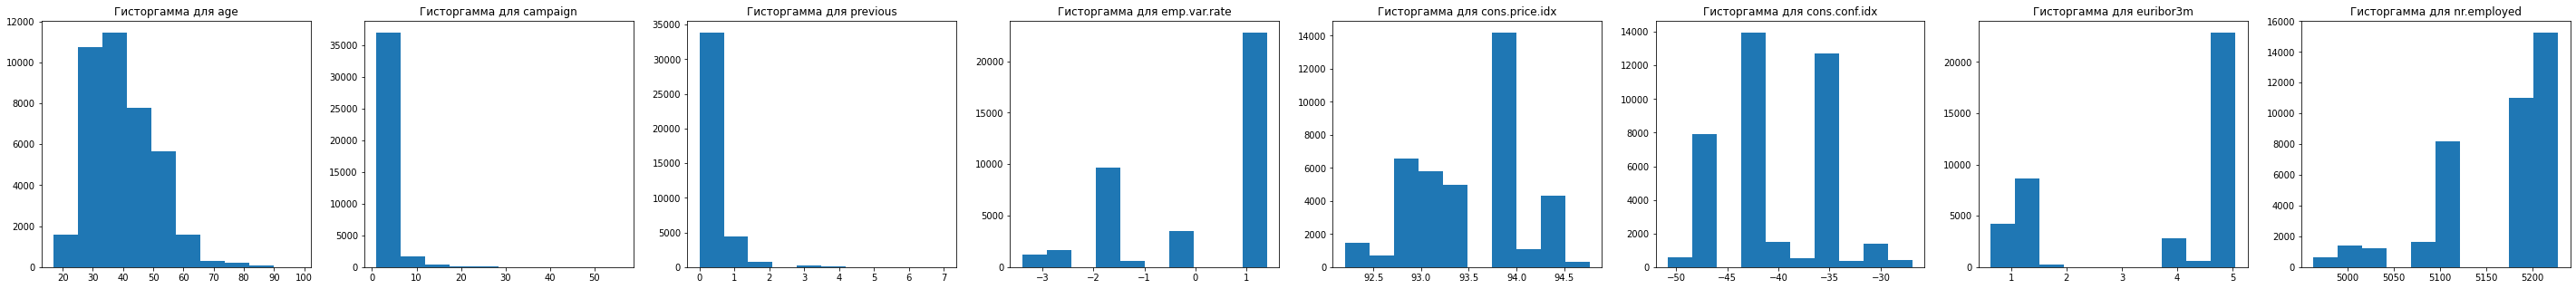

In [ ]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1, 8, figsize=(50, 5))
for i in range(len(numerics)):
    ax[i].set_title(f'Гисторгамма для {numerics[i]}')
    ax[i].hist(data[numerics[i]])
plt.show()

<h2>В столбце previous оказались немного странные значения от 2.5 до 4.5. Их мало, ими можно пренебречь. Убираем их</h2>

In [ ]:
data = data[data['previous'] < 2.5]

<h2>проверяем, не появились ли пропуски</h2>

In [ ]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<h2>Собираем названия столбцов со строковыми значениями</h2>

In [ ]:
categorials = list(data.select_dtypes(include=['object']).columns)
categorials.pop()
categorials

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'pdays',
 'poutcome']

<h2>По каждому столбцу смотрим, есть ли странные значения</h2>

In [ ]:
for col in categorials:
    print(data[col].value_counts())

admin.           9774
blue-collar      8819
technician       6357
services         3785
management       2797
retired          1646
entrepreneur     1402
self-employed    1378
housemaid        1023
unemployed        981
student           809
unknown           323
Name: job, dtype: int64
married     23716
single      10869
divorced     4430
unknown        79
Name: marital, dtype: int64
university.degree      11435
high.school             9049
basic.9y                5766
professional.course     4983
basic.4y                3967
basic.6y                2216
unknown                 1660
illiterate                18
Name: education, dtype: int64
no         30833
unknown     8258
yes            3
Name: default, dtype: int64
yes        20388
no         17737
unknown      969
Name: housing, dtype: int64
no         31986
yes         6139
unknown      969
Name: loan, dtype: int64
cellular     24382
telephone    14712
Name: contact, dtype: int64
may    13276
jul     6680
aug     5661
jun     521

<h2>Разбиваем данные на отклик и обучающую выборку. Для категориальных данных используем one-hot-encoding </h2>

In [ ]:
Y = data['y']

dummy_features = pd.get_dummies(data[categorials])

X = pd.concat([data[numerics], dummy_features], axis=1)
X

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_0,pdays_1,pdays_2,pdays_3,pdays_4,pdays_5,pdays_6,pdays_7,pdays_8,pdays_9,pdays_10,pdays_11,pdays_12,pdays_13,pdays_14,pdays_15,pdays_16,pdays_17,pdays_18,pdays_19,pdays_21,pdays_22,pdays_25,pdays_26,pdays_27,pdays_not previously contacted,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


<h2>Импортируем логистическую регрессию, создаем модель и обучаем ее</h2>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



log_res = LogisticRegression()
log_res.fit(X, Y)

y_pred = log_res.predict(X)

print(f'Weights: {log_res.coef_}, Bias: {log_res.intercept_}')
print(classification_report(Y, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Weights: [[ 1.23041235e-03  2.66000574e-02  8.00610398e-02 -9.72329356e-02
   4.37137720e-01  3.52335733e-02 -1.70916347e-01 -7.97800385e-03
   4.48093332e-02 -8.36901605e-02 -8.10922383e-03 -1.28828975e-03
  -3.54384896e-03  3.28810436e-02 -1.99085759e-03 -2.61187894e-02
   3.05549980e-02  1.73914428e-02  3.02896673e-03 -5.63533162e-04
  -1.24250801e-02 -4.97108922e-02  6.45669239e-02  9.30129572e-04
  -1.39689475e-02 -1.19064199e-02 -4.75718990e-02 -1.37418917e-02
   8.32123097e-04  1.02552681e-02  6.96712273e-02  9.79162085e-03
   7.77606629e-02 -7.43151049e-02 -8.44768145e-05  1.05542373e-02
  -2.70978165e-03 -4.48337447e-03  1.46823759e-02 -2.70978165e-03
  -8.61151309e-03  1.26293298e-01 -1.22932217e-01  2.66169260e-02
   2.23905233e-02  9.61866754e-03  9.49580041e-02  3.84805840e-02
   5.83495899e-02 -2.61382040e-01 -1.50677711e-02  1.89085947e-02
   1.04880025e-02 -1.28257233e-02 -5.02962681e-02  2.79418655e-02
   1.57484038e-02  2.27928032e-02  2.35106058e-03 -1.14968257e-04
 

In [ ]:
log_res = LogisticRegression(max_iter=1000)
log_res.fit(X, Y)

y_pred = log_res.predict(X)

print(f'Weights: {log_res.coef_}, Bias: {log_res.intercept_}')
print(classification_report(Y, y_pred))

Weights: [[ 3.33002308e-03 -4.95895214e-02  7.75816334e-02 -1.61945514e-01
   3.38867545e-01  2.11357345e-02 -1.05197048e-01 -6.30665604e-03
   7.11952157e-02 -1.60939873e-01 -1.90987409e-02 -5.76154934e-03
  -1.16622992e-02  8.78770842e-02 -6.27365582e-03 -6.40176862e-02
   7.44065588e-02  3.56452337e-02  4.09979542e-03 -2.97514006e-03
  -4.24746224e-02 -6.16266860e-02  1.03241303e-01  3.35494899e-03
  -2.59893607e-02 -1.31125133e-02 -9.10621285e-02 -3.37896870e-02
   3.16152345e-03  1.95993786e-02  1.20138143e-01  2.35495881e-02
   1.50889384e-01 -1.48121686e-01 -2.72754911e-04  2.24976599e-02
  -8.18149897e-03 -1.18212175e-02  3.46320895e-02 -8.18149897e-03
  -2.39556472e-02  3.34969135e-01 -3.32474192e-01  6.80904635e-02
   8.08672343e-02  2.84051805e-02  2.41345927e-01  9.46628203e-02
   1.71626393e-01 -6.30046362e-01 -5.25168523e-02  2.15219921e-02
  -2.14618533e-02 -2.46162741e-02 -1.55694315e-01  6.50726388e-02
   4.24578105e-02  7.52750832e-02  6.70199755e-03 -1.64534347e-03
 

In [ ]:
log_res = LogisticRegression(max_iter=1000, penalty='elasticnet', C=0.5, l1_ratio=0.5, class_weight='balanced', solver='saga')
log_res.fit(X, Y)

y_pred = log_res.predict(X)

print(f'Weights: {log_res.coef_}, Bias: {log_res.intercept_}')
print(classification_report(Y, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Weights: [[ 1.43304687e-03 -5.20213597e-02  3.83471275e-02 -1.86305350e-01
   2.04579168e-01  3.50083110e-02 -2.08591897e-01 -3.32501232e-03
   1.61993635e-02 -3.06104908e-02 -2.61590838e-03 -1.95162484e-03
  -4.98605681e-04  1.48116023e-02 -3.82088939e-04 -9.43403278e-03
   1.26651662e-02  3.45502305e-03  6.88234364e-04  2.44083773e-05
  -5.51369964e-03 -2.07878304e-02  2.81824960e-02  4.07858962e-04
  -7.23704561e-03 -4.17836468e-03 -1.60979702e-02 -3.41762947e-03
   1.94119497e-04  1.60430830e-03  2.81946413e-02  3.22695506e-03
   3.69227445e-02 -3.45893207e-02  0.00000000e+00  2.59167483e-03
  -1.83410160e-03  1.50997442e-03  7.38617513e-03 -1.83410160e-03
  -3.19017338e-03  6.54914631e-02 -6.32026545e-02  1.32944049e-02
   9.65703841e-03  3.89423331e-03  3.12032769e-02  7.70869995e-03
   2.09156797e-02 -9.84526889e-02 -9.23114346e-03  1.52858405e-02
   7.63137279e-03 -3.58999521e-03 -1.47552191e-02  8.38333780e-03
   3.49411935e-03  8.68335418e-03  5.94917500e-04  0.00000000e+00
 

In [ ]:
log_res = LogisticRegression(max_iter=1000, penalty='l1', C=0.5, class_weight='balanced', solver='liblinear')
log_res.fit(X, Y)

y_pred = log_res.predict(X)

print(f'Weights: {log_res.coef_}, Bias: {log_res.intercept_}')
print(classification_report(Y, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Weights: [[-6.36247505e-04 -4.78387343e-02 -3.66435792e-02 -8.31387993e-01
   5.77216408e-01 -7.27159823e-03  6.35618817e-01 -1.07143407e-02
   1.89504336e-02 -4.84875281e-02  2.45460034e-02 -9.12560109e-02
   0.00000000e+00  3.46631358e-01 -1.47362696e-02 -3.44298436e-02
   3.08248150e-01  1.39977030e-02 -5.93822020e-02  0.00000000e+00
  -1.08415359e-01 -7.62538191e-02  0.00000000e+00  1.50096645e-01
  -9.26844570e-02  7.01429028e-02 -5.08835312e-02 -2.74973187e-02
   1.94773328e-01 -3.42339006e-02  6.15859585e-02  0.00000000e+00
   1.92528228e-01  0.00000000e+00  0.00000000e+00  3.72254512e-02
  -1.58402846e-02  0.00000000e+00  5.66812065e-02 -5.94663778e-02
   0.00000000e+00  0.00000000e+00 -5.31506066e-01 -2.22778958e-02
   2.81006663e-01  2.37071089e-01  1.98155188e-01 -6.83489482e-02
   9.94343874e-01 -6.01685226e-01 -6.42362492e-01  0.00000000e+00
  -3.17369927e-01  0.00000000e+00 -1.84917617e-01  7.71591033e-03
  -3.75732624e-02  8.11457194e-02  0.00000000e+00 -7.43648554e-01
 

In [ ]:
log_res = LogisticRegression(max_iter=1000, penalty='l1', C=0.1, class_weight='balanced', solver='liblinear', fit_intercept=True, intercept_scaling=10)
log_res.fit(X, Y)

y_pred = log_res.predict(X)

print(f'Weights: {log_res.coef_}, Bias: {log_res.intercept_}')
print(classification_report(Y, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Weights: [[-6.13142490e-04 -4.80691927e-02  0.00000000e+00 -7.19222059e-01
   5.21915186e-01  4.27109159e-05  4.99931955e-01 -9.58129872e-03
   1.30829984e-02 -4.59075966e-02  0.00000000e+00 -4.86832643e-02
   0.00000000e+00  3.21717113e-01  0.00000000e+00 -2.92520599e-02
   2.69046143e-01  2.84606757e-03 -1.65262337e-02  0.00000000e+00
  -2.46804147e-02  0.00000000e+00  7.47161204e-02  0.00000000e+00
  -6.21382905e-02  6.69583470e-02 -2.30993074e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  8.69412826e-02  3.43379818e-03
   1.89452702e-01  0.00000000e+00  0.00000000e+00  3.39453165e-02
  -1.67989294e-02  0.00000000e+00  5.64797124e-02 -9.26095086e-03
   0.00000000e+00  0.00000000e+00 -5.13953387e-01 -2.65512483e-02
   1.76321997e-01  3.64816502e-02  1.68687728e-01 -6.07785172e-02
   9.15624305e-01 -6.32727616e-01 -6.05973800e-01  0.00000000e+00
  -2.55521625e-01  0.00000000e+00 -1.74814603e-01  2.38867988e-03
  -2.76347409e-02  7.77159451e-02  0.00000000e+00  0.00000000e+00
 

<h2>Вывод</h2>
<p>В самом начале, когда модель была без параметров, появилось сообщение о недостаточном количестве итераций. Количество итераций было увеличено. Модель хорошо предсказывала ответ no и очень плохо предсказывала ответ yes. Далее были изменены некоторые параметры и перепробованы некоторые другие комбинации параметров логистической регресии. Прдсказаняи ответа yes увеличилось до максимального значения - 0.44. Предсказания ответа yes немного ухудшились.</p>